# Assignment 4: Tracking, Time-resolved microscopy

In [1]:
import diplib as dip
import matplotlib.pyplot as plt
import numpy as np

DIPlib -- a quantitative image analysis library
Version 3.4.3 (Mar 21 2024)
For more information see https://diplib.org


In [2]:
img_folder = 'images/'
fn_pattern = 'MTLn3{group}00{num}.tif'
group_names = {'egf': '+egf', 'ctrl': '-ctrl'}

In [3]:
def remove_border_objects(img):
    seed = np.ones(np.array(img.Sizes()) - 2)
    seed = 1 - np.pad(seed, pad_width=1)
    seed = dip.FixedThreshold(dip.Image(seed), 0.5)
    edge_objects = dip.BinaryPropagation(seed, img)
    img -= edge_objects
    return img

In [4]:
images = {'ctrl': {}, 'egf': {}}

for group in images.keys():
    for num in range(30):
        num_str = '0' + str(num) if num < 10 else str(num)
        images[group][num] = dip.ImageReadTIFF(img_folder + fn_pattern.format(group=group_names[group], num=num_str))

In [ ]:
# for num in images['ctrl'].keys():
#     img = images['ctrl'][num]
#     rescaled_img = img / 2 ** 16 # rescale to [0..1]
#     grey_img = dip.ColorSpaceManager.Convert(img, 'grey') # convert from RGB to grey-scale
#     even_img = grey_img - dip.Tophat(img, 10) # remove background
#     bin_img = dip.IsodataThreshold(img) # apply ISODATA threshold
#     noe_img = remove_border_objects(img)
    
#     images['ctrl'][num] = noe_img

In [6]:
img = images['ctrl'][8]
rescaled_img = img / 2 ** 16 # rescale to [0..1]
grey_img = dip.ColorSpaceManager.Convert(rescaled_img, 'grey') # convert from RGB to grey-scale
even_img = grey_img - dip.Tophat(grey_img, 10) # remove background
bin_img = dip.IsodataThreshold(even_img) # apply ISODATA threshold
noe_img = remove_border_objects(bin_img)
label_img = dip.Label(noe_img)
label_img = dip.Label(noe_img)

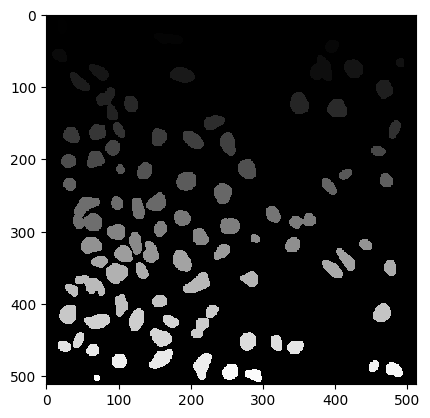

In [7]:
label_img.Show()

In [14]:
msr = dip.MeasurementTool.Measure(label_img, grey_img, ['Size'])

print(msr)

   |                 Gravity | 
-- | ----------------------- | 
   |       dim0 |       dim1 | 
   |       (fm) |       (fm) | 
-- | ---------- | ---------- | 
 1 |        inf |        inf | 
 2 |        inf |        inf | 
 3 |        inf |        inf | 
 4 |        inf |        inf | 
 5 |        inf |        inf | 
 6 |        inf |        inf | 
 7 |        inf |        inf | 
 8 |        inf |        inf | 
 9 |        inf |        inf | 
10 |        inf |        inf | 
11 |        inf |        inf | 
12 |        inf |        inf | 
13 |        inf |        inf | 
14 |        inf |        inf | 
15 |        inf |        inf | 
16 |        inf |        inf | 
17 |        inf |        inf | 
18 |        inf |        inf | 
19 |        inf |        inf | 
20 |        inf |        inf | 
21 |        inf |        inf | 
22 |        inf |        inf | 
23 |        inf |        inf | 
24 |        inf |        inf | 
25 |        inf |        inf | 
26 |        inf |        inf | 
27 |    

/var/folders/j8/xlfl488j7csblljxvg0xx4nh0000gn/T/ipykernel_77141/3477970764.py:3: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist_tif = np.histogram(img_data, bins=100)


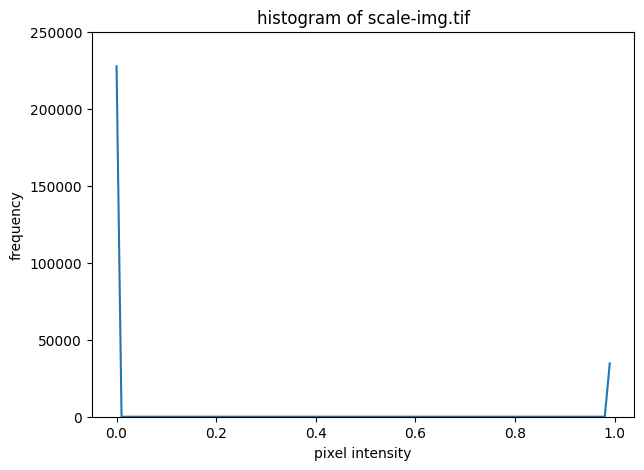

In [379]:
img_data = np.asarray(img)

hist_tif = np.histogram(img_data, bins=100)

plt.figure(figsize=(7, 5))
plt.plot(hist_tif[1][:-1], hist_tif[0], label='TIFF')
plt.title('histogram of scale-img.tif')
plt.xlabel('pixel intensity')
plt.ylabel('frequency')
plt.ylim(0, 250_000)

plt.show()